In [2]:
moviesDatasetPath = r'F:\class\ut\2\data mining\HW & CA\CA2\Datasets\movies.csv'
ratingsDatasetPath = r'F:\class\ut\2\data mining\HW & CA\CA2\Datasets\ratings.csv'

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy import stats
import matplotlib as mpl
import matplotlib.colors as colors
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

# Question 1:

### - Preprocessing:

In [4]:
moviesDataset = pd.read_csv(moviesDatasetPath)
ratingsDataset = pd.read_csv(ratingsDatasetPath)

In [5]:
moviesDataset.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratingsDataset.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


##### checking missing values:

In [7]:
moviesDataframe = pd.DataFrame(moviesDataset);
ratingsDataframe = pd.DataFrame(ratingsDataset);

In [8]:
total1 = moviesDataframe.isnull().sum().sort_values(ascending = False)
percent1 = (moviesDataframe.isnull().sum()/moviesDataframe.isnull().count()).sort_values(ascending = False)
missing_data1 = pd.concat([total1,percent1], axis = 1, keys = ['Total', 'Percent'])
print(missing_data1.to_string())

         Total  Percent
movieId      0      0.0
title        0      0.0
genres       0      0.0


In [9]:
total2 = ratingsDataframe.isnull().sum().sort_values(ascending = False)
percent2 = (ratingsDataframe.isnull().sum()/ratingsDataframe.isnull().count()).sort_values(ascending = False)
missing_data2 = pd.concat([total2,percent2], axis = 1, keys = ['Total', 'Percent'])
print(missing_data2.to_string())

           Total  Percent
userId         0      0.0
movieId        0      0.0
rating         0      0.0
timestamp      0      0.0


##### checking irrelevant data:

In [10]:
genres_categories = moviesDataframe['genres'].unique().tolist()

print(genres_categories)

['Adventure|Animation|Children|Comedy|Fantasy', 'Adventure|Children|Fantasy', 'Comedy|Romance', 'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller', 'Adventure|Children', 'Action', 'Action|Adventure|Thriller', 'Comedy|Horror', 'Adventure|Animation|Children', 'Drama', 'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance', 'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller', 'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi', 'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi', 'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War', 'Action|Crime|Drama', 'Action|Adventure|Fantasy', 'Comedy|Drama|Thriller', 'Mystery|Thriller', 'Animation|Children|Drama|Musical|Romance', 'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller', 'Comedy|Crime', 'Action|Sci-Fi|Thriller', 'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary', 'Action|Crime|Drama|Thriller', 'Crime|Drama|Romance', 'Action|Adventure|Drama', 'Action|Thriller', 'Drama|Horror|Thriller

In [11]:
rating_categories = ratingsDataframe['rating'].unique().tolist()

print(rating_categories)

[4.0, 5.0, 3.0, 2.0, 1.0, 4.5, 3.5, 2.5, 0.5, 1.5]


##### merging two datasets:

In [12]:
movies_ratings_dataframe = pd.merge(moviesDataframe, ratingsDataframe, on='movieId', how='outer')
movies_ratings_dataframe

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09
...,...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0,1.537109e+09
100850,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5,1.537110e+09
100851,193585,Flint (2017),Drama,184.0,3.5,1.537110e+09
100852,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184.0,3.5,1.537110e+09


##### search for movies without rating or ratings for movies not in the dataset :

In [13]:
total3 = movies_ratings_dataframe.isnull().sum().sort_values(ascending = False)
percent3 = (movies_ratings_dataframe.isnull().sum()/movies_ratings_dataframe.isnull().count()).sort_values(ascending = False)
missing_data3 = pd.concat([total3,percent3], axis = 1, keys = ['Total', 'Percent'])
print(missing_data3.to_string())

           Total   Percent
userId        18  0.000178
rating        18  0.000178
timestamp     18  0.000178
movieId        0  0.000000
title          0  0.000000
genres         0  0.000000


##### barPlot:

##### -> barPlot for 30 movies with the most number of ratings:

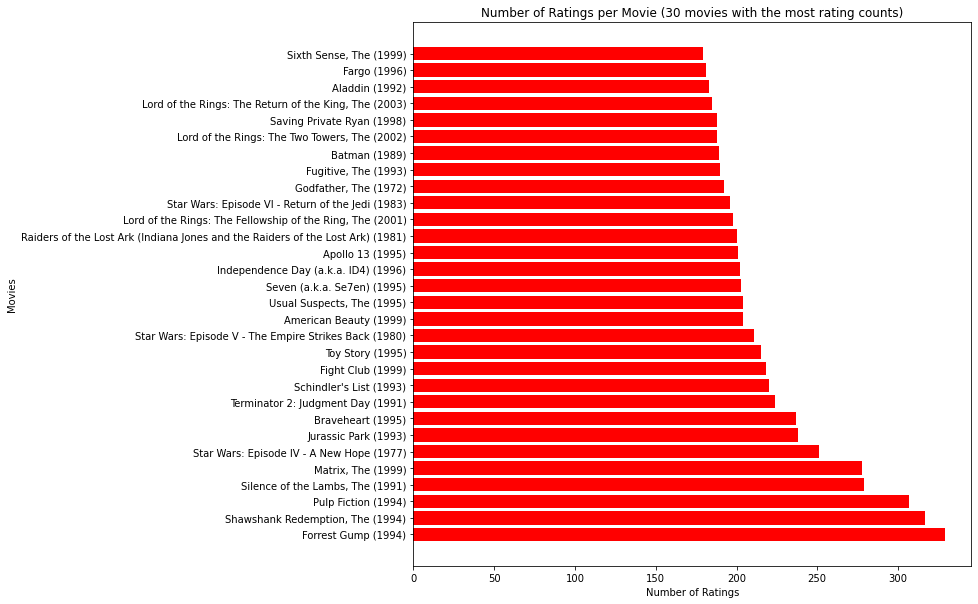

In [14]:
ratings_per_movie = movies_ratings_dataframe.groupby('title')['rating'].count()
ratings_per_movie = ratings_per_movie.sort_values(ascending=False)
top_30_movies = ratings_per_movie.head(30)

fig, ax = plt.subplots(figsize=(10,10))
ax.barh(top_30_movies.index, top_30_movies.values, color='r')

ax.set_title('Number of Ratings per Movie (30 movies with the most rating counts)')
ax.set_xlabel('Number of Ratings')
ax.set_ylabel('Movies')

plt.show()

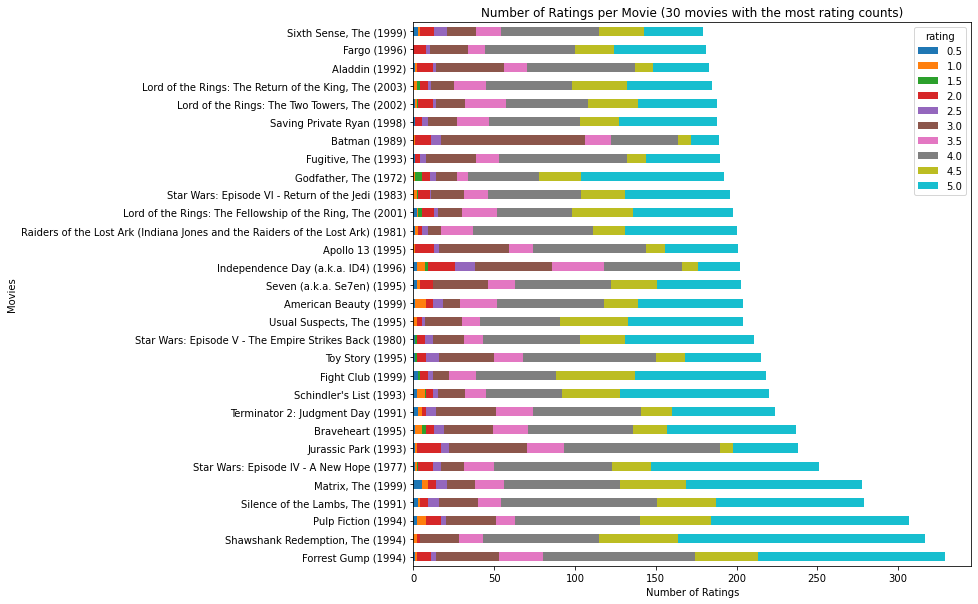

In [15]:
table = pd.crosstab(movies_ratings_dataframe['title'], movies_ratings_dataframe['rating'])
sorted_table = table.sum(axis=1).sort_values(ascending=False)
top_30_movies = sorted_table.head(30)
top_30_data = table.loc[top_30_movies.index]

fig, ax = plt.subplots(figsize=(10,10))

top_30_data.plot.barh(stacked=True, ax=ax)

ax.set_title('Number of Ratings per Movie (30 movies with the most rating counts)')
ax.set_xlabel('Number of Ratings')
ax.set_ylabel('Movies')

plt.show()

##### -> barPlot for 30 movies with the least number of ratings:

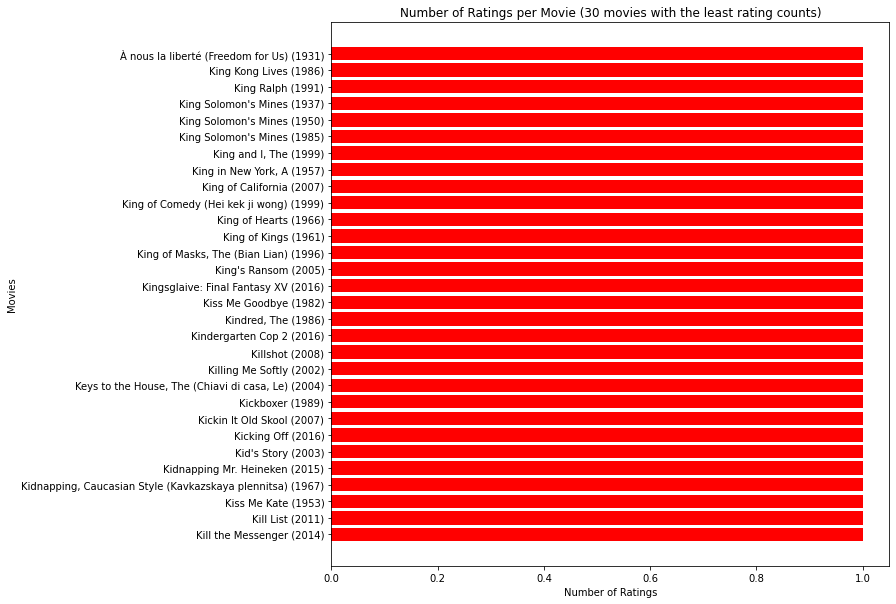

In [16]:
# removing the movies without any ratings
movies_ratings_dataframe_noNULL = movies_ratings_dataframe.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)

ratings_per_movie = movies_ratings_dataframe_noNULL.groupby('title')['rating'].count()
ratings_per_movie = ratings_per_movie.sort_values(ascending=False)

least_30_movies = ratings_per_movie.tail(30)

fig, ax = plt.subplots(figsize=(10,10))
ax.barh(least_30_movies.index, least_30_movies.values, color='r')

ax.set_title('Number of Ratings per Movie (30 movies with the least rating counts)')
ax.set_xlabel('Number of Ratings')
ax.set_ylabel('Movies')

plt.show()

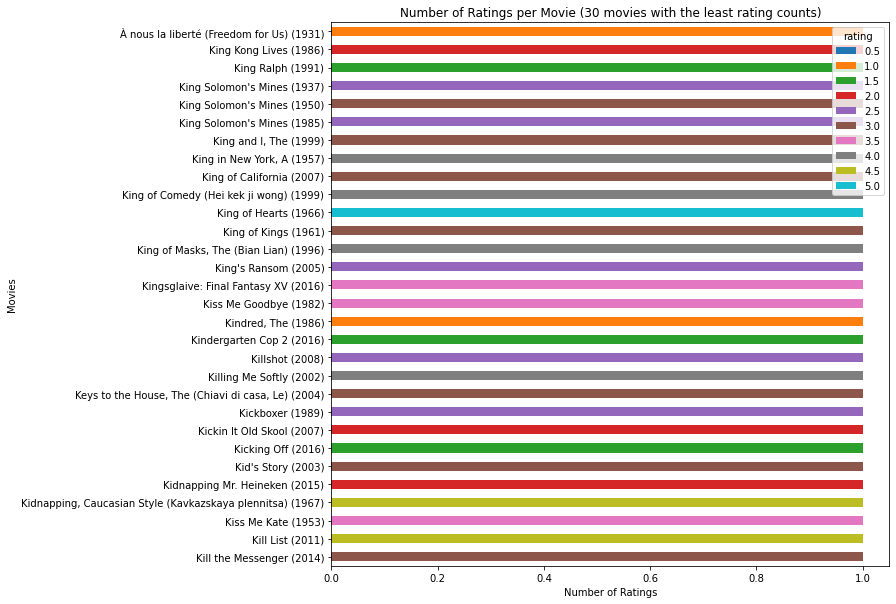

In [17]:
table = pd.crosstab(movies_ratings_dataframe_noNULL['title'], movies_ratings_dataframe_noNULL['rating'])
sorted_table = table.sum(axis=1).sort_values(ascending=False)
least_30_movies = sorted_table.tail(30)
least_30_movies = table.loc[least_30_movies.index]

fig, ax = plt.subplots(figsize=(10,10))

least_30_movies.plot.barh(stacked=True, ax=ax)

ax.set_title('Number of Ratings per Movie (30 movies with the least rating counts)')
ax.set_xlabel('Number of Ratings')
ax.set_ylabel('Movies')

plt.show()

# Question 2:

### number of ratings:

In [18]:
len(ratingsDataset.index)

100836

### number of unique movies:

In [19]:
moviesDataset['movieId'].nunique()

9742

In [20]:
moviesDataset['title'].nunique()

9737

In [21]:
duplicate_movieId = moviesDataset[moviesDataset.duplicated('movieId')]

duplicate_movieId

,movieId,title,genres


In [22]:
duplicate_title = moviesDataset[moviesDataset.duplicated('title')]

duplicate_title

,movieId,title,genres
5601,26958,Emma (1996),Romance
6932,64997,War of the Worlds (2005),Action|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller


### 10 movies with the most ratings:

In [23]:
ratings_per_movie = movies_ratings_dataframe.groupby('title')['rating'].count()
ratings_per_movie = ratings_per_movie.sort_values(ascending=False)
top_10_movies = ratings_per_movie.head(10)

top_10_movies

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

### number of users who rated Forrest Gump:

In [24]:
ForrestGump_ratings = movies_ratings_dataframe[movies_ratings_dataframe['title'] == 'Forrest Gump (1994)']

ForrestGump_ratings

,movieId,title,genres,userId,rating,timestamp
10019,356,Forrest Gump (1994),Comedy|Drama|Romance|War,1.0,4.0,9.649810e+08
10020,356,Forrest Gump (1994),Comedy|Drama|Romance|War,6.0,5.0,8.455532e+08
10021,356,Forrest Gump (1994),Comedy|Drama|Romance|War,7.0,5.0,1.106636e+09
10022,356,Forrest Gump (1994),Comedy|Drama|Romance|War,8.0,3.0,8.394635e+08
10023,356,Forrest Gump (1994),Comedy|Drama|Romance|War,10.0,3.5,1.455302e+09
...,...,...,...,...,...,...
10343,356,Forrest Gump (1994),Comedy|Drama|Romance|War,605.0,3.0,1.277098e+09
10344,356,Forrest Gump (1994),Comedy|Drama|Romance|War,606.0,4.0,1.171231e+09
10345,356,Forrest Gump (1994),Comedy|Drama|Romance|War,608.0,3.0,1.117163e+09
10346,356,Forrest Gump (1994),Comedy|Drama|Romance|War,609.0,4.0,8.472209e+08


In [25]:
users_rating_ForrestGump_count = len(ForrestGump_ratings['userId'].unique())

users_rating_ForrestGump_count

329

# Question 3:

### part1: Apriori

In [26]:
itemsets = movies_ratings_dataframe.groupby('userId')['title'].apply(list)

itemsets

userId
1.0      [Toy Story (1995), Grumpier Old Men (1995), He...
2.0      [Shawshank Redemption, The (1994), Tommy Boy (...
3.0      [Dangerous Minds (1995), Schindler's List (199...
4.0      [Get Shorty (1995), Twelve Monkeys (a.k.a. 12 ...
5.0      [Toy Story (1995), Get Shorty (1995), Babe (19...
                               ...                        
606.0    [Toy Story (1995), Sabrina (1995), American Pr...
607.0    [Toy Story (1995), American President, The (19...
608.0    [Toy Story (1995), Jumanji (1995), Grumpier Ol...
609.0    [Toy Story (1995), GoldenEye (1995), Bravehear...
610.0    [Toy Story (1995), Heat (1995), Casino (1995),...
Name: title, Length: 610, dtype: object

In [27]:
te = TransactionEncoder()
te_ary = te.fit(itemsets).transform(itemsets)
one_hot = pd.DataFrame(te_ary, columns=te.columns_)

one_hot

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
606,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
607,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##### -> min_sup = 0.1:

In [153]:
count0=0
for i in range(1, len(one_hot.columns)+1):
    
    frequent_itemsets = apriori(one_hot, min_support=0.1, use_colnames=True, max_len=i)
    count = len(frequent_itemsets)
    temp = count
    count = count-count0
    count0 = temp
    
    if(i < 2):
        continue
    if(count > 0):
        print(f"There are {count} frequent itemsets with length {i} and minimum support of 0.1.")
    else:
        break

There are 5061 frequent itemsets with length 2 and minimum support of 0.1.
There are 21556 frequent itemsets with length 3 and minimum support of 0.1.
There are 38160 frequent itemsets with length 4 and minimum support of 0.1.
There are 33837 frequent itemsets with length 5 and minimum support of 0.1.
There are 16419 frequent itemsets with length 6 and minimum support of 0.1.
There are 4365 frequent itemsets with length 7 and minimum support of 0.1.
There are 607 frequent itemsets with length 8 and minimum support of 0.1.
There are 35 frequent itemsets with length 9 and minimum support of 0.1.
There are 1 frequent itemsets with length 10 and minimum support of 0.1.


##### -> min_sup = 0.2:

In [154]:
count0=0
for i in range(1, len(one_hot.columns)+1):
    
    frequent_itemsets = apriori(one_hot, min_support=0.2, use_colnames=True, max_len=i)
    count = len(frequent_itemsets)
    temp = count
    count = count-count0
    count0 = temp
    
    if(i < 2):
        continue
    if(count > 0):
        print(f"There are {count} frequent itemsets with length {i} and minimum support of 0.2.")
    else:
        break

There are 226 frequent itemsets with length 2 and minimum support of 0.2.
There are 93 frequent itemsets with length 3 and minimum support of 0.2.
There are 10 frequent itemsets with length 4 and minimum support of 0.2.


##### -> min_sup = 0.3:

In [155]:
count0=0
for i in range(1, len(one_hot.columns)+1):
    
    frequent_itemsets = apriori(one_hot, min_support=0.3, use_colnames=True, max_len=i)
    count = len(frequent_itemsets)
    temp = count
    count = count-count0
    count0 = temp
    
    if(i < 2):
        continue
    if(count > 0):
        print(f"There are {count} frequent itemsets with length {i} and minimum support of 0.3.")
    else:
        break

There are 11 frequent itemsets with length 2 and minimum support of 0.3.


##### -> min_sup = 0.5:

In [156]:
count0=0
for i in range(1, len(one_hot.columns)+1):
    
    frequent_itemsets = apriori(one_hot, min_support=0.5, use_colnames=True, max_len=i)
    count = len(frequent_itemsets)
    temp = count
    count = count-count0
    count0 = temp
    
    if(i < 2):
        continue
    if(count > 0):
        print(f"There are {count} frequent itemsets with length {i} and minimum support of 0.5.")
    else:
        break

### part2: It doesn't have any code. The answer is in the report file.

### part3: FPGrowth:

##### -> min_sup = 0.1:

In [71]:
frequent_itemsets = fpgrowth(one_hot, min_support=0.1, use_colnames=True, max_len=20)
frequent_itemsets

,support,itemsets
0,0.539344,(Forrest Gump (1994))
1,0.503279,(Pulp Fiction (1994))
2,0.457377,"(Silence of the Lambs, The (1991))"
3,0.455738,"(Matrix, The (1999))"
4,0.411475,(Star Wars: Episode IV - A New Hope (1977))
...,...,...
120364,0.101639,"(Jerry Maguire (1996), Independence Day (a.k.a..."
120365,0.106557,"(Jerry Maguire (1996), Star Wars: Episode IV -..."
120366,0.104918,"(Jerry Maguire (1996), Silence of the Lambs, T..."
120367,0.114754,"(Jerry Maguire (1996), Forrest Gump (1994))"


In [148]:
count0=0
for i in range(1, len(one_hot.columns)+1):
    
    frequent_itemsets = fpgrowth(one_hot, min_support=0.1, use_colnames=True, max_len=i)
    count = len(frequent_itemsets)
    temp = count
    count = count-count0
    count0 = temp
    
    if(count > 0 ):
        print(f"There are {count} frequent itemsets with length {i} and minimum support of 0.1.")
    else:
        break

There are 328 frequent itemsets with length 1 and minimum support of 0.1.
There are 5061 frequent itemsets with length 2 and minimum support of 0.1.
There are 21556 frequent itemsets with length 3 and minimum support of 0.1.
There are 38160 frequent itemsets with length 4 and minimum support of 0.1.
There are 33837 frequent itemsets with length 5 and minimum support of 0.1.
There are 16419 frequent itemsets with length 6 and minimum support of 0.1.
There are 4365 frequent itemsets with length 7 and minimum support of 0.1.
There are 607 frequent itemsets with length 8 and minimum support of 0.1.
There are 35 frequent itemsets with length 9 and minimum support of 0.1.
There are 1 frequent itemsets with length 10 and minimum support of 0.1.


##### -> min_sup = 0.2:

In [73]:
frequent_itemsets = fpgrowth(one_hot, min_support=0.2, use_colnames=True, max_len=20)
frequent_itemsets

,support,itemsets
0,0.539344,(Forrest Gump (1994))
1,0.503279,(Pulp Fiction (1994))
2,0.457377,"(Silence of the Lambs, The (1991))"
3,0.455738,"(Matrix, The (1999))"
4,0.411475,(Star Wars: Episode IV - A New Hope (1977))
...,...,...
408,0.216393,"(Star Wars: Episode IV - A New Hope (1977), Go..."
409,0.216393,"(Godfather, The (1972), Pulp Fiction (1994))"
410,0.209836,"(Forrest Gump (1994), Godfather, The (1972))"
411,0.208197,"(Godfather, The (1972), Silence of the Lambs, ..."


In [149]:
count0=0
for i in range(1, len(one_hot.columns)+1):
    
    frequent_itemsets = fpgrowth(one_hot, min_support=0.2, use_colnames=True, max_len=i)
    count = len(frequent_itemsets)
    temp = count
    count = count-count0
    count0 = temp
    
    if(count > 0 ):
        print(f"There are {count} frequent itemsets with length {i} and minimum support of 0.2.")
    else:
        break

There are 84 frequent itemsets with length 1 and minimum support of 0.2.
There are 226 frequent itemsets with length 2 and minimum support of 0.2.
There are 93 frequent itemsets with length 3 and minimum support of 0.2.
There are 10 frequent itemsets with length 4 and minimum support of 0.2.


##### -> min_sup = 0.3:

In [74]:
frequent_itemsets = fpgrowth(one_hot, min_support=0.3, use_colnames=True, max_len=20)
frequent_itemsets

,support,itemsets
0,0.539344,(Forrest Gump (1994))
1,0.503279,(Pulp Fiction (1994))
2,0.457377,"(Silence of the Lambs, The (1991))"
3,0.455738,"(Matrix, The (1999))"
4,0.411475,(Star Wars: Episode IV - A New Hope (1977))
5,0.390164,(Jurassic Park (1993))
6,0.388525,(Braveheart (1995))
7,0.360656,(Schindler's List (1993))
8,0.357377,(Fight Club (1999))
9,0.352459,(Toy Story (1995))


In [150]:
count0=0
for i in range(1, len(one_hot.columns)+1):
    
    frequent_itemsets = fpgrowth(one_hot, min_support=0.3, use_colnames=True, max_len=i)
    count = len(frequent_itemsets)
    temp = count
    count = count-count0
    count0 = temp
    
    if(count > 0 ):
        print(f"There are {count} frequent itemsets with length {i} and minimum support of 0.3.")
    else:
        break

There are 28 frequent itemsets with length 1 and minimum support of 0.3.
There are 11 frequent itemsets with length 2 and minimum support of 0.3.


##### -> min_sup = 0.5:

In [75]:
frequent_itemsets = fpgrowth(one_hot, min_support=0.5, use_colnames=True, max_len=20)
frequent_itemsets

,support,itemsets
0,0.539344,(Forrest Gump (1994))
1,0.503279,(Pulp Fiction (1994))
2,0.519672,"(Shawshank Redemption, The (1994))"


In [151]:
count0=0
for i in range(1, len(one_hot.columns)+1):
    
    frequent_itemsets = fpgrowth(one_hot, min_support=0.5, use_colnames=True, max_len=i)
    count = len(frequent_itemsets)
    temp = count
    count = count-count0
    count0 = temp
    
    if(count > 0 ):
        print(f"There are {count} frequent itemsets with length {i} and minimum support of 0.5.")
    else:
        break

There are 3 frequent itemsets with length 1 and minimum support of 0.5.


# Question 4:

### Association Rule:

### Part1: conf=0.6

In [61]:
frequent_itemsets = apriori(one_hot, min_support=0.3, use_colnames=True)

rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Braveheart (1995)),(Forrest Gump (1994)),0.388525,0.539344,0.300000,0.772152,1.431649,0.090451,2.021767
1,(Forrest Gump (1994)),(Jurassic Park (1993)),0.539344,0.390164,0.324590,0.601824,1.542489,0.114157,1.531573
2,(Jurassic Park (1993)),(Forrest Gump (1994)),0.390164,0.539344,0.324590,0.831933,1.542489,0.114157,2.740902
3,"(Matrix, The (1999))",(Forrest Gump (1994)),0.455738,0.539344,0.318033,0.697842,1.293871,0.072233,1.524551
4,(Forrest Gump (1994)),(Pulp Fiction (1994)),0.539344,0.503279,0.377049,0.699088,1.389068,0.105609,1.650720
5,(Pulp Fiction (1994)),(Forrest Gump (1994)),0.503279,0.539344,0.377049,0.749186,1.389068,0.105609,1.836640
6,(Forrest Gump (1994)),"(Shawshank Redemption, The (1994))",0.539344,0.519672,0.378689,0.702128,1.351097,0.098406,1.612529
7,"(Shawshank Redemption, The (1994))",(Forrest Gump (1994)),0.519672,0.539344,0.378689,0.728707,1.351097,0.098406,1.697998
8,(Forrest Gump (1994)),"(Silence of the Lambs, The (1991))",0.539344,0.457377,0.326230,0.604863,1.322461,0.079546,1.373253
9,"(Silence of the Lambs, The (1991))",(Forrest Gump (1994)),0.457377,0.539344,0.326230,0.713262,1.322461,0.079546,1.606537


In [62]:
len(rules)

20

In [63]:
rules = rules.sort_values(by='lift', ascending=False)
rules.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(Star Wars: Episode IV - A New Hope (1977)),(Star Wars: Episode V - The Empire Strikes Bac...,0.411475,0.345902,0.311475,0.756972,2.188403,0.169145,2.691454
18,(Star Wars: Episode V - The Empire Strikes Bac...,(Star Wars: Episode IV - A New Hope (1977)),0.345902,0.411475,0.311475,0.900474,2.188403,0.169145,5.913271
11,(Star Wars: Episode IV - A New Hope (1977)),"(Matrix, The (1999))",0.411475,0.455738,0.300000,0.729084,1.599788,0.112475,2.008968


In [64]:
rules['calculated_lift'] = (rules['support'] / len(one_hot)) / (rules['antecedent support'] * rules['consequent support'])

rules = rules.sort_values(by='calculated_lift', ascending=False)
rules.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,calculated_lift
19,(Star Wars: Episode IV - A New Hope (1977)),(Star Wars: Episode V - The Empire Strikes Bac...,0.411475,0.345902,0.311475,0.756972,2.188403,0.169145,2.691454,0.003588
18,(Star Wars: Episode V - The Empire Strikes Bac...,(Star Wars: Episode IV - A New Hope (1977)),0.345902,0.411475,0.311475,0.900474,2.188403,0.169145,5.913271,0.003588
11,(Star Wars: Episode IV - A New Hope (1977)),"(Matrix, The (1999))",0.411475,0.455738,0.300000,0.729084,1.599788,0.112475,2.008968,0.002623


In [65]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,calculated_lift
19,(Star Wars: Episode IV - A New Hope (1977)),(Star Wars: Episode V - The Empire Strikes Bac...,0.411475,0.345902,0.311475,0.756972,2.188403,0.169145,2.691454,0.003588
18,(Star Wars: Episode V - The Empire Strikes Bac...,(Star Wars: Episode IV - A New Hope (1977)),0.345902,0.411475,0.311475,0.900474,2.188403,0.169145,5.913271,0.003588
11,(Star Wars: Episode IV - A New Hope (1977)),"(Matrix, The (1999))",0.411475,0.455738,0.300000,0.729084,1.599788,0.112475,2.008968,0.002623
10,"(Matrix, The (1999))",(Star Wars: Episode IV - A New Hope (1977)),0.455738,0.411475,0.300000,0.658273,1.599788,0.112475,1.722209,0.002623
1,(Forrest Gump (1994)),(Jurassic Park (1993)),0.539344,0.390164,0.324590,0.601824,1.542489,0.114157,1.531573,0.002529
2,(Jurassic Park (1993)),(Forrest Gump (1994)),0.390164,0.539344,0.324590,0.831933,1.542489,0.114157,2.740902,0.002529
14,(Pulp Fiction (1994)),"(Silence of the Lambs, The (1991))",0.503279,0.457377,0.339344,0.674267,1.474204,0.109156,1.665852,0.002417
15,"(Silence of the Lambs, The (1991))",(Pulp Fiction (1994)),0.457377,0.503279,0.339344,0.741935,1.474204,0.109156,1.924795,0.002417
0,(Braveheart (1995)),(Forrest Gump (1994)),0.388525,0.539344,0.300000,0.772152,1.431649,0.090451,2.021767,0.002347
13,(Pulp Fiction (1994)),"(Shawshank Redemption, The (1994))",0.503279,0.519672,0.363934,0.723127,1.391506,0.102395,1.734831,0.002281


### Part2: conf=0.8

In [66]:
frequent_itemsets = apriori(one_hot, min_support=0.3, use_colnames=True)

rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.8)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Jurassic Park (1993)),(Forrest Gump (1994)),0.390164,0.539344,0.324590,0.831933,1.542489,0.114157,2.740902
1,(Star Wars: Episode V - The Empire Strikes Bac...,(Star Wars: Episode IV - A New Hope (1977)),0.345902,0.411475,0.311475,0.900474,2.188403,0.169145,5.913271


In [67]:
len(rules)

2

In [68]:
rules = rules.sort_values(by='lift', ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Star Wars: Episode V - The Empire Strikes Bac...,(Star Wars: Episode IV - A New Hope (1977)),0.345902,0.411475,0.311475,0.900474,2.188403,0.169145,5.913271
0,(Jurassic Park (1993)),(Forrest Gump (1994)),0.390164,0.539344,0.324590,0.831933,1.542489,0.114157,2.740902


In [69]:
rules['calculated_lift'] = (rules['support'] / len(one_hot)) / (rules['antecedent support'] * rules['consequent support'])

rules = rules.sort_values(by='calculated_lift', ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,calculated_lift
1,(Star Wars: Episode V - The Empire Strikes Bac...,(Star Wars: Episode IV - A New Hope (1977)),0.345902,0.411475,0.311475,0.900474,2.188403,0.169145,5.913271,0.003588
0,(Jurassic Park (1993)),(Forrest Gump (1994)),0.390164,0.539344,0.324590,0.831933,1.542489,0.114157,2.740902,0.002529
